In [3]:
from src.elastic_search_utils.elastic_utils import load_json
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
bm25_scores = load_json('/datasets/johan_tests_original_format/test_docs_10b-testset4.json')

In [11]:
centroid_scores  = load_json('/datasets/johan_tests_original_format/merged_training_docs/test_entity_10b-testset4.json')

In [12]:
y_true = []
y_test = []
for index, question in enumerate(bm25_scores['questions']):
    centroid_doc_ids = [
        doc['id'] for doc
        in centroid_scores['questions'][index]['documents']
    ]
    centroid_score_vals = [
        doc['score'] for doc
        in centroid_scores['questions'][index]['documents']
    ]
    if centroid_score_vals != sorted(centroid_score_vals, reverse=True):
        print("FUCK")

    question['documents'] = [
        doc for doc in question['documents']
        if doc['id'] in centroid_doc_ids
    ]
    question_doc_ids = [
      doc['id'] for doc
      in question['documents']
    ]
    question_doc_pos = [
        i for i in range(len(question_doc_ids))
    ]   
    
    centroid_doc_pos = [
        question_doc_ids.index(doc_id) for doc_id in centroid_doc_ids
    ]

    y_true.extend(question_doc_pos)
    y_test.extend(centroid_doc_pos)

In [13]:
conf_matrix = confusion_matrix(y_true, y_test)

In [ ]:
plt.figure(figsize=(100,100))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.savefig('confmat.png')

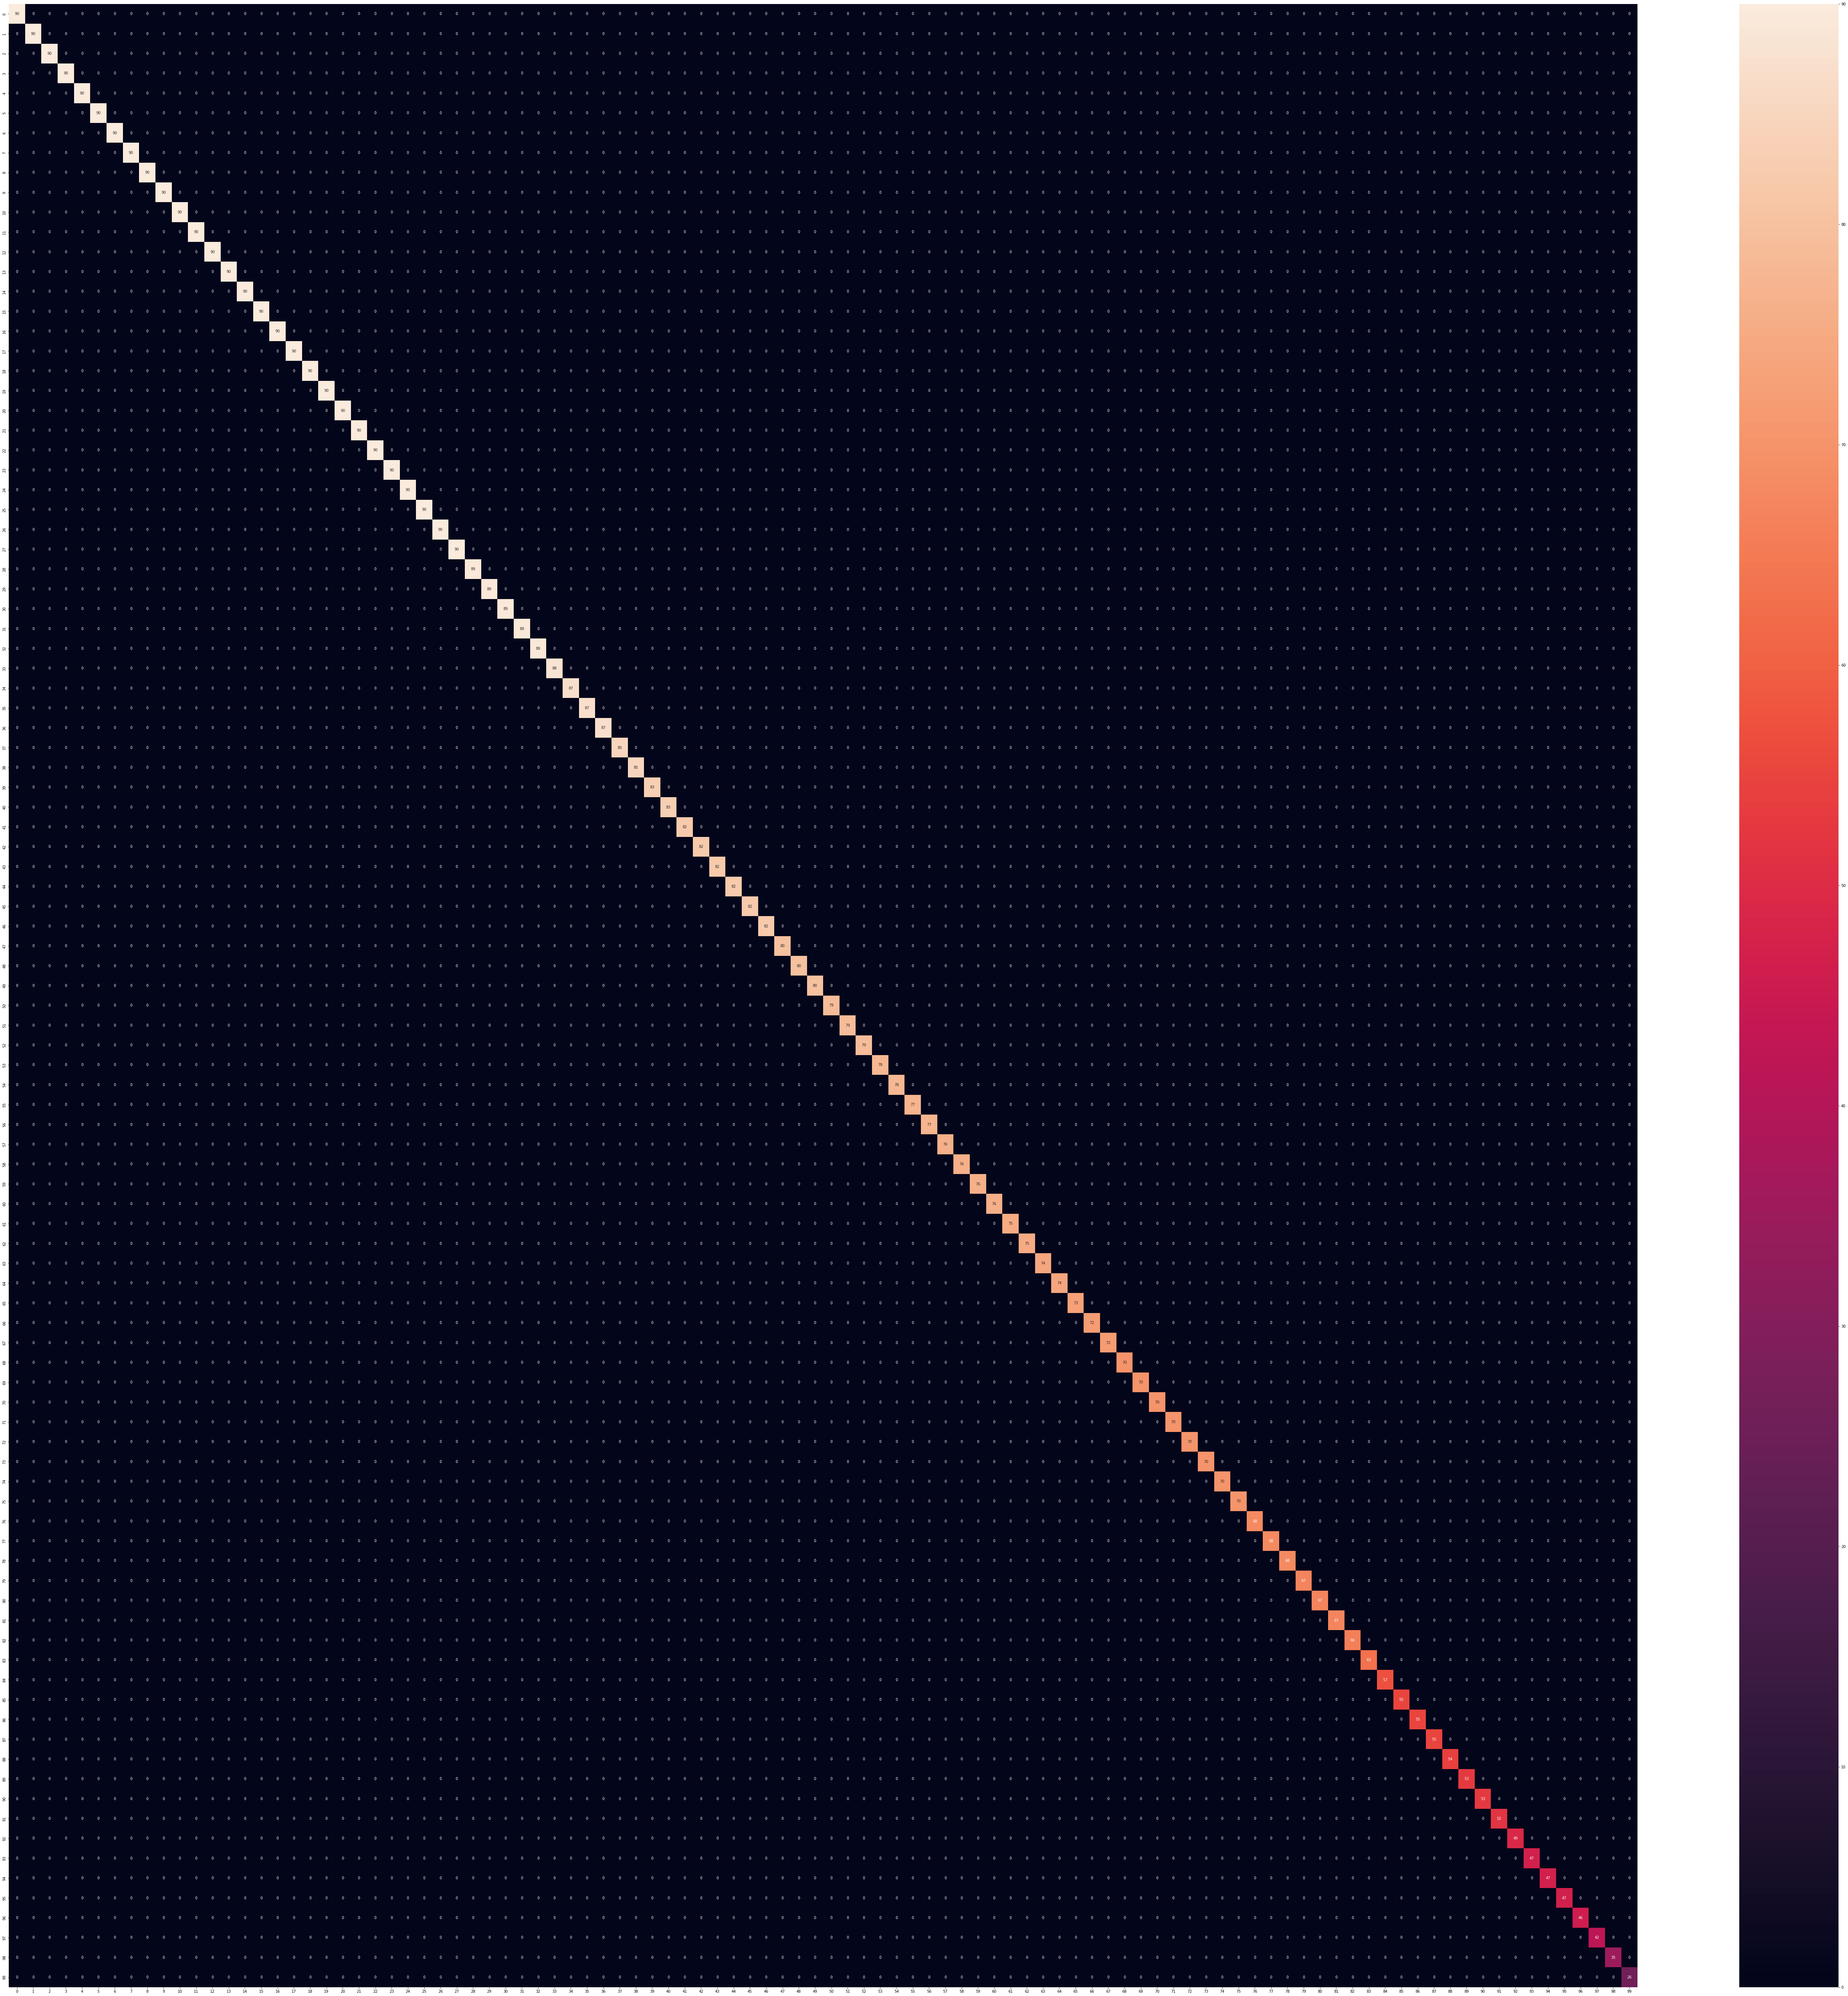

In [9]:
ideal_conf_matrix = confusion_matrix(y_true, y_true)
plt.figure(figsize=(100,100))
sns.heatmap(ideal_conf_matrix, annot=True, fmt="d")
plt.savefig('idealconfmat.png')